In [1]:
PROJECT   = 'pide23f7ea9d71'
READ_KEY  = 'd5c81802-a1f6-46a2-ad31-8be10d7172f4'

URL = "https://cenote.sidero.services/api/projects/" + PROJECT

import requests

def cenote_get(event_name, query_type, query_dict={}):
    get_url = "{0}/queries/{1}".format(URL, query_type)
    query_dict["readKey"] = READ_KEY
    query_dict["event_collection"] = event_name
    r = requests.get(get_url, query_dict)
    r = dict(r.json())
    if r["ok"]:
        return r["results"]
    else:
        raise RuntimeError("Query unsuccessful due to {0}. Message is: {1}".format(
            r["results"], r["message"]))
        
import pandas

# Custom filter on extraction to get data from a given sensor only
cus_filter = '[{"property_name":"un","operator":"eq","property_value":"ADU-700HP_V2"}]'
res = cenote_get("measurements", "extraction", {"filters": cus_filter, "latest": 50000})

# Transform query result to a pandas DataFrame
df = pandas.DataFrame(res)
df = df.sort_values(by="epoch").drop_duplicates(subset="epoch").reset_index(drop=True)

# Convert keys
df = df.convert_dtypes()
keys = ['solar', 'precipitation', 'windspeed', 'winddirection', 'temperature', 'humidity', 
        'cntv2', 'vwc1', 'temp1', 'ec1', 'vwc2', 'temp2', 'ec2', 'analogv1', 'cntv1',
        'analogv3', 'cntv3', 'cntvm']

for key in keys:
    df[key] = pandas.to_numeric(df[key], errors="coerce")

df.epoch = pandas.to_datetime(df.epoch, unit='ms')

import numpy as np

df.loc[df.temperature < -100, ('temperature')] = np.nan
for key in ["windspeed", "winddirection", "humidity"]:
    df.loc[df[key] < 0, (key)] = np.nan

In [2]:
df

,filename,f,pn,uid,un,dt,ch,gps,epoch,solar,...,uuid,cenote$created_at,cenote$timestamp,cenote$id,ai21temp,ai22rh,ai23cnt1,ai31level,ai32cnt1,unknown16
0,ADU-700HP_V2_200418082030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,18/04/2020 02:25:24,18,0,2020-04-18 02:30:24,0.0,...,6cd28a13-3cd7-4e2b-a745-8088f22b40a4,1602993334152,1602993334152,2937d07c-2abe-471f-970e-fbf7771c7061,None,None,None,None,None,<NA>
1,ADU-700HP_V2_200418082030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,18/04/2020 02:25:24,18,0,2020-04-18 02:35:24,0.0,...,3f824656-111a-483b-b844-56296cd373e2,1602993334226,1602993334226,f464d533-1afa-415c-8b74-b3fe62eedfb5,None,None,None,None,None,<NA>
2,ADU-700HP_V2_200418082030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,18/04/2020 02:25:24,18,0,2020-04-18 02:40:24,0.0,...,b18c7154-27d3-4ea6-b1c2-bf93e7e50309,1602993334297,1602993334297,95a35eab-a19e-4e67-a685-34e6d4850ab7,None,None,None,None,None,<NA>
3,ADU-700HP_V2_200418082030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,18/04/2020 02:25:24,18,0,2020-04-18 02:45:24,0.0,...,a992b0a4-8944-48fd-9a1a-8f636e6c1e71,1602993334371,1602993334371,b7478707-032e-40bc-8aba-20be05425e76,None,None,None,None,None,<NA>
4,ADU-700HP_V2_200418082030.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,18/04/2020 02:25:24,18,0,2020-04-18 02:50:24,0.0,...,8c999533-f4bf-48cf-9a98-0f2c02444e6d,1602993334443,1602993334443,7bf61bc4-33fe-4e9c-8f0f-f6eb3c28df18,None,None,None,None,None,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,ADU-700HP_V2_201022224530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,22/10/2020 16:50:24,18,0,2020-10-22 19:30:24,0.0,...,9df22fb1-2b76-4568-b44a-bfd751f01304,1603396189230,1603396189230,c04ef481-68e9-4e8a-9f1d-2f50e591819f,None,None,None,None,None,<NA>
49996,ADU-700HP_V2_201022224530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,22/10/2020 16:50:24,18,0,2020-10-22 19:35:24,0.0,...,65ee923b-d112-41ae-ac5a-87bb2d4793f3,1603396189444,1603396189444,6214088a-987d-4249-89c2-e84aded7eb25,None,None,None,None,None,<NA>
49997,ADU-700HP_V2_201022224530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,22/10/2020 16:50:24,18,0,2020-10-22 19:40:24,0.0,...,22ba3599-97b0-47e5-a668-631781af6da3,1603396189673,1603396189673,3d860fad-7f27-4112-a477-ab2d0832faff,None,None,None,None,None,<NA>
49998,ADU-700HP_V2_201022224530.TXT,31.2.1,+306948701112,00000001,ADU-700HP_V2,22/10/2020 16:50:24,18,0,2020-10-22 19:45:24,0.0,...,f4c03c88-1e4e-47ec-92d7-076efce2c20f,1603396189906,1603396189906,d3c141eb-20ba-491c-8440-47d14e930299,None,None,None,None,None,<NA>


In [3]:
df.columns

Index(['filename', 'f', 'pn', 'uid', 'un', 'dt', 'ch', 'gps', 'epoch', 'solar',
       'precipitation', 'windspeed', 'winddirection', 'temperature',
       'humidity', 'cntv2', 'vwc1', 'temp1', 'ec1', 'vwc2', 'temp2', 'ec2',
       'analogv1', 'cntv1', 'analogv3', 'cntv3', 'cntvm', 'uuid',
       'cenote$created_at', 'cenote$timestamp', 'cenote$id', 'ai21temp',
       'ai22rh', 'ai23cnt1', 'ai31level', 'ai32cnt1', 'unknown16'],
      dtype='object')

# Weather forecast

## Build a meteo DataFrame

### Select only the relevant features (columns)

In [4]:
meteo_df = df[['epoch', 'solar', 'precipitation', 'windspeed', 'winddirection', 'humidity', 'temperature']]
meteo_df

,epoch,solar,precipitation,windspeed,winddirection,humidity,temperature
0,2020-04-18 02:30:24,0.0,0.0,0.58,54.2,0.973,5.6
1,2020-04-18 02:35:24,0.0,0.0,0.52,63.6,0.975,5.6
2,2020-04-18 02:40:24,0.0,0.0,0.45,79.7,0.949,5.9
3,2020-04-18 02:45:24,0.0,0.0,0.55,47.9,0.991,5.3
4,2020-04-18 02:50:24,0.0,0.0,0.42,48.4,0.995,5.0
...,...,...,...,...,...,...,...
49995,2020-10-22 19:30:24,0.0,0.0,1.40,119.2,0.704,12.9
49996,2020-10-22 19:35:24,0.0,0.0,1.68,99.9,0.667,13.6
49997,2020-10-22 19:40:24,0.0,0.0,0.98,93.0,0.687,13.2
49998,2020-10-22 19:45:24,0.0,0.0,0.74,83.8,0.693,13.0


### Resample to 3 hours

In [5]:
meteo_df = meteo_df.set_index("epoch").resample("3H").mean()
meteo_df

,solar,precipitation,windspeed,winddirection,humidity,temperature
epoch,,,,,,
2020-04-18 00:00:00,0.000000,0.0,0.496667,51.016667,0.976167,5.400000
2020-04-18 03:00:00,0.000000,0.0,0.788333,88.191667,0.953861,7.458333
2020-04-18 06:00:00,0.000000,0.0,1.133611,228.988889,0.757000,16.133333
2020-04-18 09:00:00,0.000000,0.0,1.257778,238.633333,0.546278,21.655556
2020-04-18 12:00:00,0.000000,0.0,1.373333,208.455556,0.495444,24.808333
...,...,...,...,...,...,...
2020-10-22 06:00:00,299.611111,0.0,1.110278,179.391667,0.715889,15.097222
2020-10-22 09:00:00,511.888889,0.0,1.547778,225.838889,0.571083,20.308333
2020-10-22 12:00:00,348.305556,0.0,1.248611,225.780556,0.472056,22.655556


## Build a dataset --- predict given the current settings the temperature in 3 hours!

In [6]:
dataset_df = meteo_df.copy(deep=True)

### Extra feature: hour in 24 hour format

In [7]:
dataset_df.loc[:, ("hour")] = [obj.hour for obj in meteo_df.index.time]
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour
epoch,,,,,,,
2020-04-18 00:00:00,0.000000,0.0,0.496667,51.016667,0.976167,5.400000,0
2020-04-18 03:00:00,0.000000,0.0,0.788333,88.191667,0.953861,7.458333,3
2020-04-18 06:00:00,0.000000,0.0,1.133611,228.988889,0.757000,16.133333,6
2020-04-18 09:00:00,0.000000,0.0,1.257778,238.633333,0.546278,21.655556,9
2020-04-18 12:00:00,0.000000,0.0,1.373333,208.455556,0.495444,24.808333,12
...,...,...,...,...,...,...,...
2020-10-22 06:00:00,299.611111,0.0,1.110278,179.391667,0.715889,15.097222,6
2020-10-22 09:00:00,511.888889,0.0,1.547778,225.838889,0.571083,20.308333,9
2020-10-22 12:00:00,348.305556,0.0,1.248611,225.780556,0.472056,22.655556,12


### Add a column with the future temperature (the target variable)

In [8]:
future_temp = dataset_df.temperature.tolist()
# Delete the first element to offset all by one ...
future_temp = future_temp[1:]
# Delete the last row of dataset_df as we have no target for it ...
dataset_df.drop(dataset_df.tail(1).index,inplace=True)
# And now add the target!
dataset_df.loc[:, ('future_temperature')] = future_temp
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour,future_temperature
epoch,,,,,,,,
2020-04-18 00:00:00,0.000000,0.0,0.496667,51.016667,0.976167,5.400000,0,7.458333
2020-04-18 03:00:00,0.000000,0.0,0.788333,88.191667,0.953861,7.458333,3,16.133333
2020-04-18 06:00:00,0.000000,0.0,1.133611,228.988889,0.757000,16.133333,6,21.655556
2020-04-18 09:00:00,0.000000,0.0,1.257778,238.633333,0.546278,21.655556,9,24.808333
2020-04-18 12:00:00,0.000000,0.0,1.373333,208.455556,0.495444,24.808333,12,19.783333
...,...,...,...,...,...,...,...,...
2020-10-22 03:00:00,14.166667,0.0,0.666944,95.791667,0.855417,7.500000,3,15.097222
2020-10-22 06:00:00,299.611111,0.0,1.110278,179.391667,0.715889,15.097222,6,20.308333
2020-10-22 09:00:00,511.888889,0.0,1.547778,225.838889,0.571083,20.308333,9,22.655556


In [9]:
dataset_df = dataset_df.dropna()
dataset_df

,solar,precipitation,windspeed,winddirection,humidity,temperature,hour,future_temperature
epoch,,,,,,,,
2020-04-18 00:00:00,0.000000,0.0,0.496667,51.016667,0.976167,5.400000,0,7.458333
2020-04-18 03:00:00,0.000000,0.0,0.788333,88.191667,0.953861,7.458333,3,16.133333
2020-04-18 06:00:00,0.000000,0.0,1.133611,228.988889,0.757000,16.133333,6,21.655556
2020-04-18 09:00:00,0.000000,0.0,1.257778,238.633333,0.546278,21.655556,9,24.808333
2020-04-18 12:00:00,0.000000,0.0,1.373333,208.455556,0.495444,24.808333,12,19.783333
...,...,...,...,...,...,...,...,...
2020-10-22 03:00:00,14.166667,0.0,0.666944,95.791667,0.855417,7.500000,3,15.097222
2020-10-22 06:00:00,299.611111,0.0,1.110278,179.391667,0.715889,15.097222,6,20.308333
2020-10-22 09:00:00,511.888889,0.0,1.547778,225.838889,0.571083,20.308333,9,22.655556


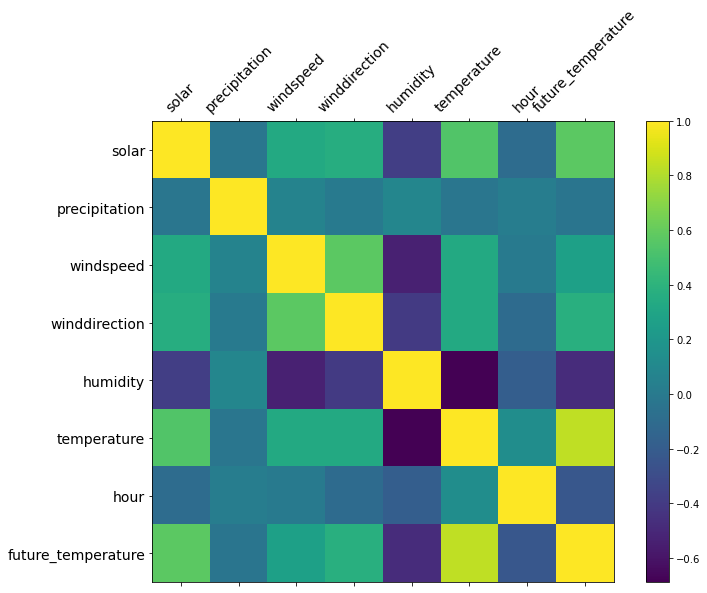

In [10]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(11.69, 8.27))
plt.matshow(dataset_df.corr(), fignum=f.number)
plt.xticks(range(dataset_df.shape[1]), dataset_df.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset_df.shape[1]), dataset_df.columns, fontsize=14)
cb = plt.colorbar()

In [11]:
temp_diff = dataset_df.temperature - dataset_df.future_temperature
temp_diff.describe()

count    1388.000000
mean       -0.006845
std         3.214097
min        -9.205556
25%        -2.309722
50%         0.411468
75%         2.309028
max         8.655556
dtype: float64

<AxesSubplot:>

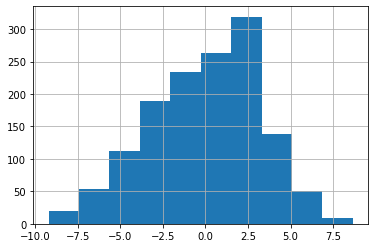

In [12]:
temp_diff.hist()

## Use scikit-learn to build a model


[sklearn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

### Create numpy arrays 

In [13]:
X = dataset_df.loc[:, dataset_df.columns != 'future_temperature'].to_numpy()
y = dataset_df.loc[:, dataset_df.columns == 'future_temperature'].to_numpy().flatten()
y

array([ 7.45833333, 16.13333333, 21.65555556, ..., 22.65555556,
       17.40555556, 13.76521739])

### Split the data to training and testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=2020)

In [15]:
print("Training size: {0}\n Testing size: {1}".format(
    len(y_train), len(y_test)))

Training size: 929
 Testing size: 459


### Build a model

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

y_hat = reg.predict(X_test)

### Validate --- Model assessment

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print("RMSE: {0:.2f}, R2: {1:.2f}".format( 
      sqrt(mean_squared_error(y_true=y_test, y_pred=y_hat)),
      r2_score(y_true=y_test, y_pred=y_hat)
     ))

RMSE: 2.21, R2: 0.85


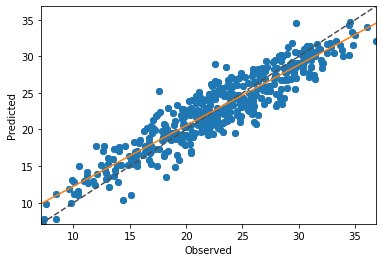

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_hat, 'o')

axis_min = min(min(y_test), min(y_hat))
axis_max = max(max(y_test), max(y_hat))

plt.scatter(y_test, y_hat, linestyle="None", marker="o")
plt.xlim(axis_min, axis_max)
plt.ylim(axis_min, axis_max)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.plot([axis_min, axis_max], [axis_min, axis_max], ls="--", c=".3")
m, b = np.polyfit(y_test, y_hat, 1)
step = (axis_max - axis_min ) / 100
x_lsq = np.arange(axis_min, axis_max+step, step)
plt.plot(x_lsq, [i * m + b for i in x_lsq], '-')